Space and Time!

Introduction to numerical solution of PDEs

1D linear convection

1D convection equation:
$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

The equation is a wave propogating with speed c in x direction

inital condition $u(x,0) = u_0(x)$ gives the equation an exact solution:
$$u(x,t) = u_0(x-ct)$$



Finite-differences

Now we need to discretize with respect to BOTH space and time. 

Imagine space time plot where coordinates vertical direction represent advancing in time. Horizontal directino is space. 

For numerical solution of $u(x,t)$ we use subscripts $u_i$ to denote the spatial position and superscripts to denote temporal instant like $u^n$

Our grid will be built with constant steps in time and space:

$$x_i = i \Delta x  \ \ \ and \ \ \ t^n = n \Delta t$$
$$u_i^n = u(i \Delta x, n \Delta t)$$



Discretizing our Model Equation

Partial derivative wrt time changes only with time and not with space, the discretized form changes only n indices. Similiarly with x and i indices.

Discretize the spatial coordinate x into points indexed i = 0 to N and then step in discrete time intervals.

we know from definition of derivative

$$\frac{\partial u}{\partial x} = \frac{u(x+ \Delta x) - u(x)}{\Delta x}$$

We have three finite difference approximations at $x_i$

Forward difference: uses $x_i$ and $x_i + \Delta x$

Backward difference: uses $x_i$ and $x_i - \Delta x$

Central difference: uses points on either side of $x_i$

The three formulas are:

$$\frac{\partial u}{\partial x} = \frac{u(x_{i+1}) - u(x_i)}{\Delta x}$$

$$\frac{\partial u}{\partial x} = \frac{u(x_i) - u(x_{i-1})}{\Delta x}$$

$$\frac{\partial u}{\partial x} = \frac{u(x_{i+1}) - u(x_{i-1})}{2\Delta x}$$

Euler's method is equivalent to using a forward-difference scheme for the time derivative. We will stick with that and use backward-difference scheme for the space derivative. Our discrete equation is:

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$$

n and n+1 are two consecutive steps in time and i and i-1 are two neighboring points of discretized x coordinate. Given initial conditions, the only unkown is the discretization $u_i^{n+1}$ we solve this for the unknown that allows us to step in time.

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n)$$

And Compute!

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Initial condition defined as follows for square wave:
\begin{equation}
u(x,0) = \begin{cases}2 & \text{where} 0.5 \leq x \leq 1, \\
1 & \text{everywhere else in } (0,2)
\end{cases}
\end{equation}

Boundary condition on x: let $u = 1 \ at \ x = 0$ Our spatial domain for numerical solution will only cover range x in (0,2)

We will now create an evenly space grid of points within domain. Let's make some variables!

In [25]:
nx = 100 #number of spatial grid points
dx = 2/(nx-1) # distance between
nt = 25 #time grid points
dt = .02 #time step
c = 1 #wave speed
x = numpy.linspace(0,2,nx)

In [33]:
u = numpy.ones(nx) #define array of ones which is nx elements long
lbound = numpy.where(x>= 0.5) #Use where to see places the array does or does not meet given criteria
ubound = numpy.where(x<=1)

#This will return an array of indices that meet the given criteria

print(lbound)
print(ubound)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]),)


In [34]:
bounds = numpy.intersect1d(lbound,ubound) # combine these two arrays
u[bounds]=2
print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


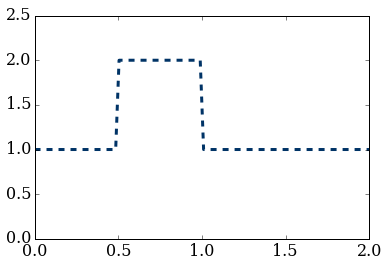

In [28]:
#Look at initial conditions with plot
pyplot.plot(x,u,color='#003366', ls = '--', lw=3)
pyplot.ylim(0,2.5);

The graph shows slightly angled vertical lines so its not quite what we expected.

for every element of our array u we need to perform operation:
$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n)$$

We will store the result in a new temporary array un, which will be solution u for the next time step. 

Initialize placeholder array un to hold values

In [29]:
for n in range(1,nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i]-c*dt/dx*(un[i]-un[i-1])

(0, 2.5)

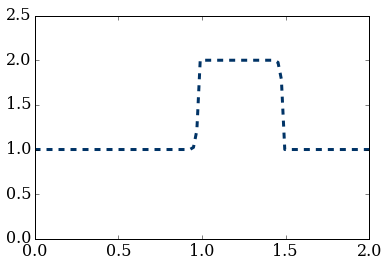

In [30]:
pyplot.plot(x,u,color='#003366', ls='--',lw=3)
pyplot.ylim(0,2.5)
#Increased grid size from 41 to 100 to make the graph better

Spatial Truncation Error

Recall the finite difference appx we are using:

$$\frac{\partial u}{\partial x} = \frac{u(x+ \Delta x) - u(x)}{\Delta x}$$

Using a Taylor series expansion for the spatial terms, we see the backwards-difference scheme produces a first order method in space:

$$\frac{\partial u}{\partial x}(x_i) = \frac{u(x_i) - u(x_{i-1})}{\Delta x} + \frac{\Delta x}{2}\frac{\partial^2 u}{\partial x^2}(x_i)-\frac{\Delta x^2}{6}\frac{\partial^3 u}{\partial x^3}(x_i)+...$$

the dominant term that is neglected in the finite difference is of $O(\Delta x)$. We also see that the appx converges to exact derivative as $\Delta x$ goes to 0

Summary! The forward-time/backward-space scheme is first-order in both space and time: truncation errors are $O(\Delta t, \Delta x)$



Non-linear convection

1-D convection equation:


$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x}$$ = 0

Now constant wave speed c is variable speed u

use the same discretization as for linear convection:

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$$

Solving for unkonw term $u_i^{n+1}$

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n)$$

So far, very little needs to change from our code above.

In [35]:
nx = 41
dx = 2/(nx-1)
nt = 10
dt = .02

x = numpy.linspace(0,2,nx)
lbound = numpy.where(x>= 0.5) #Use where to see places the array does or does not meet given criteria
ubound = numpy.where(x<=1)


u=numpy.ones(nx)


u[numpy.intersect1d(lbound, ubound)]=2


(0, 2.5)

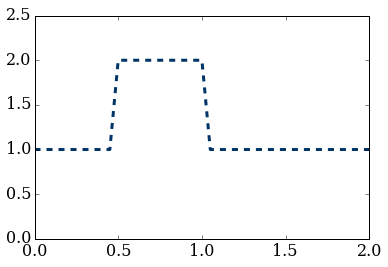

In [36]:
pyplot.plot(x,u,color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5)

In [37]:
for n in range(1,nt):
    un = u.copy()
    for i in range(1,nx):
        u[1:] = un[1:]-un[1:]*dt/dx*(un[1:]-un[0:-1])
        u[0] = 1.0

(0, 2.5)

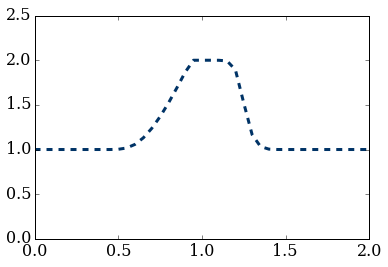

In [38]:
pyplot.plot(x,u,color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5)